<a href="https://colab.research.google.com/github/hebaashraf21/KNN_K-means_PCA_CUDA_Implementation/blob/main/knn/knn_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def knn_without_cuda(reference_points, query_points, k):
    results = []
    for query_point in query_points:
        distances = np.linalg.norm(reference_points - query_point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        results.append(nearest_indices)
    return results

In [4]:
# Function to measure time for non-CUDA implementation
def measure_time(reference_size, query_size, k,dim):
    reference_points = np.random.rand(reference_size, dim)
    query_points = np.random.rand(query_size, dim)
    start_time = time.time()
    knn_without_cuda(reference_points, query_points, k)
    end_time = time.time()
    return end_time - start_time

Time taken with reference size 100: 0.0210 seconds
Time taken with reference size 1000: 0.1030 seconds
Time taken with reference size 10000: 1.2297 seconds
Time taken with reference size 50000: 7.4251 seconds
Time taken with reference size 100000: 15.8074 seconds
Time taken with reference size 1000000: 193.7431 seconds


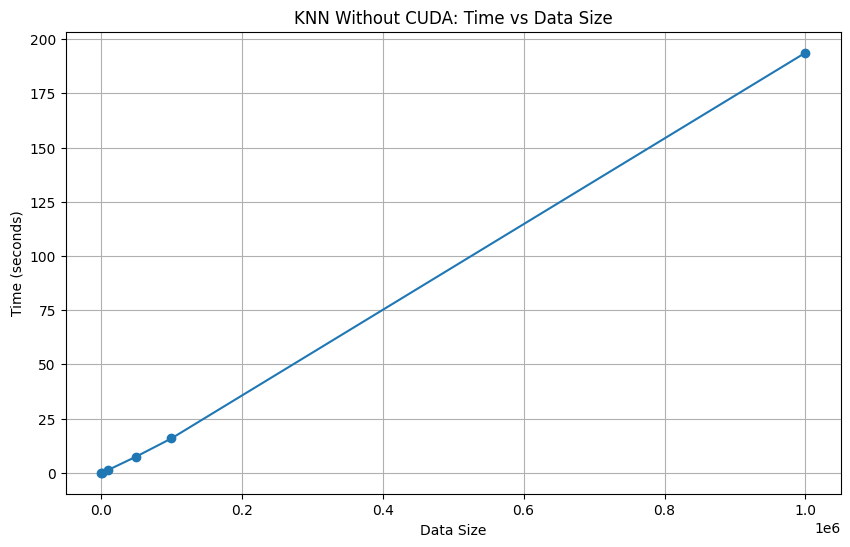

In [9]:
# Define different sizes for reference and query points
sizes = [100, 1000, 10000, 50000, 100000,1000000]
times = []

# Measure time for each size
for size in sizes:
    time_taken = measure_time(size, 1000, 5,3)
    times.append(time_taken)
    print(f"Time taken with reference size {size}: {time_taken:.4f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('KNN Without CUDA: Time vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

Time taken with reference size 100 and k=1: 0.0199 seconds
Time taken with reference size 1000 and k=1: 0.1101 seconds
Time taken with reference size 10000 and k=1: 1.1946 seconds
Time taken with reference size 50000 and k=1: 6.9072 seconds
Time taken with reference size 100000 and k=1: 15.9807 seconds
Time taken with reference size 1000000 and k=1: 186.7799 seconds


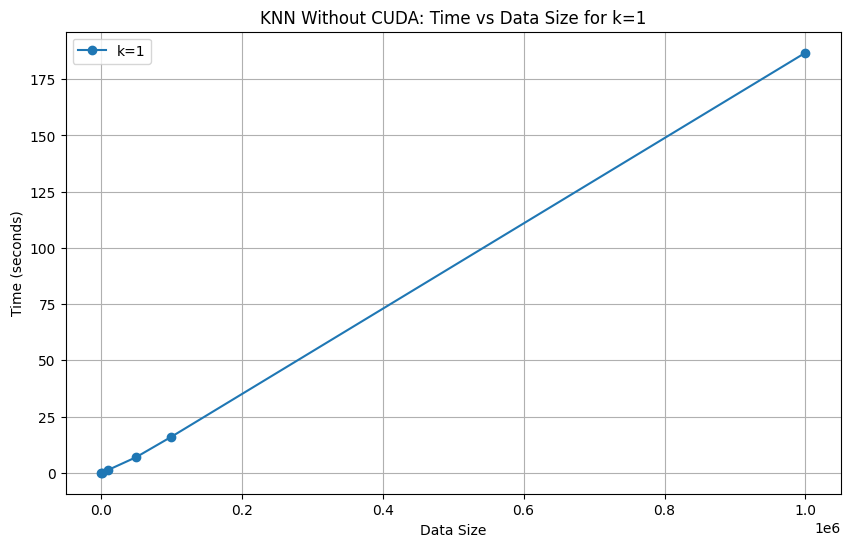

Time taken with reference size 100 and k=5: 0.0237 seconds
Time taken with reference size 1000 and k=5: 0.1006 seconds
Time taken with reference size 10000 and k=5: 1.2164 seconds
Time taken with reference size 50000 and k=5: 7.5133 seconds
Time taken with reference size 100000 and k=5: 16.0350 seconds
Time taken with reference size 1000000 and k=5: 188.8256 seconds


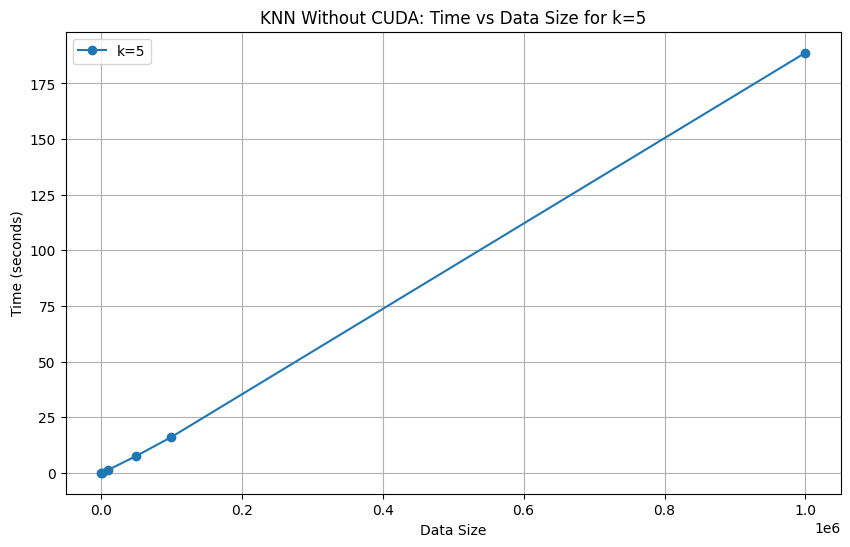

Time taken with reference size 100 and k=10: 0.0231 seconds
Time taken with reference size 1000 and k=10: 0.1004 seconds
Time taken with reference size 10000 and k=10: 1.2172 seconds
Time taken with reference size 50000 and k=10: 7.1110 seconds
Time taken with reference size 100000 and k=10: 15.8668 seconds
Time taken with reference size 1000000 and k=10: 194.9085 seconds


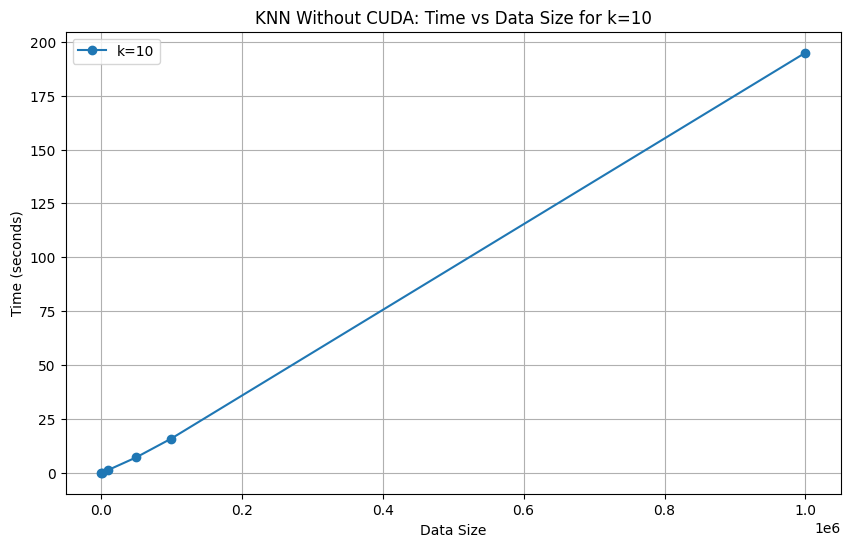

Time taken with reference size 100 and k=20: 0.0435 seconds
Time taken with reference size 1000 and k=20: 0.1515 seconds
Time taken with reference size 10000 and k=20: 1.4790 seconds
Time taken with reference size 50000 and k=20: 7.2088 seconds
Time taken with reference size 100000 and k=20: 16.2802 seconds
Time taken with reference size 1000000 and k=20: 191.5900 seconds


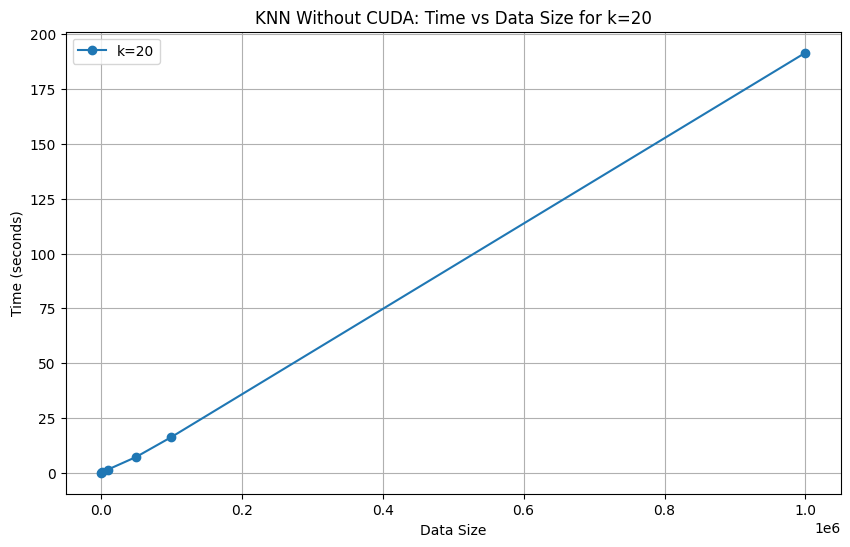

In [10]:
# Define different sizes for reference.
sizes = [100, 1000, 10000, 50000, 100000, 1000000]
k_values = [1, 5, 10, 20]
dim = 3

for k in k_values:
    times = []
    for size in sizes:
        time_taken = measure_time(size, 1000, k, dim)
        times.append(time_taken)
        print(f"Time taken with reference size {size} and k={k}: {time_taken:.4f} seconds")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, marker='o', label=f'k={k}')
    plt.title(f'KNN Without CUDA: Time vs Data Size for k={k}')
    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()